In [10]:
from ppopt.mpmodel import MPModeler, VariableType
from ppopt.mp_solvers.solve_mpmiqp import solve_mpmiqp_enumeration, mpmiqp_algorithm, solve_mpmiqp
from ppopt.plot import parametric_plot

In [11]:
m = MPModeler()

u = m.add_var(name='u')
x = m.add_var(name='x')
z = m.add_var(name='z')
t1 = m.add_var(name='t1')
t2 = m.add_var(name='t2')
mu = m.add_var(name='mu')
s1 = m.add_var(name='s1')
s2 = m.add_var(name='s2')
s3 = m.add_var(name='s3')
l1 = m.add_var(name='l1')
l2 = m.add_var(name='l2')
l3 = m.add_var(name='l3')
p1 = m.add_var(name='p1', vtype=VariableType.binary)
p2 = m.add_var(name='p2', vtype=VariableType.binary)
p3 = m.add_var(name='p3', vtype=VariableType.binary)

d1 = m.add_param(name='d1')
d2 = m.add_param(name='d2')

In [12]:
m.add_constr(-2*x + 3*z -t1 == 50 -d2)
m.add_constr(-s1 -x +z/2 +t1/2 -t2/2 + u == 25 +d1 -7*d2/2)
m.add_constr(-s2 +2*x -2*z +4*t1/3 +t2 +u == 151/3 +2*d2)
m.add_constr(s3 -x + 5*z/2 +t1/2 -t2 -u == 26 +d1 -d2/2)
m.add_constr(l1 + l2 + l3 == 1)
m.add_constr(2*mu + l1 - 2*l2 - l3 == 100)
m.add_constr(3*mu + l1/2 - 2*l2 - 5*l3/2 == 150)
m.add_constr(l1 - p1 <= 0)
m.add_constr(l2 - p2 <= 0)
m.add_constr(l3 - p3 <= 0)
m.add_constr(s1 + 1000*p1 <= 1000)
m.add_constr(s2 + 1000*p2 <= 1000)
m.add_constr(s3 + 1000*p3 <= 1000)
m.add_constr(p1 + p2 + p3 <= 2)
m.add_constr(0 <= t1)
m.add_constr(t1 <= 4)
m.add_constr(0 <= t2)
m.add_constr(t2 <= 4)
m.add_constr(0 <= d1)
m.add_constr(d1 <= 5)
m.add_constr(0 <= d2)
m.add_constr(d2 <= 5)
m.add_constr(0 <= x)
m.add_constr(0 <= z)
m.add_constr(0 <= u)
m.add_constr(0 <= mu)
m.add_constr(0 <= l1)
m.add_constr(0 <= l2)
m.add_constr(0 <= l3)
m.add_constr(0 <= s1)
m.add_constr(0 <= s2)
m.add_constr(0 <= s3)

In [13]:
m.set_objective(-u + 50)

In [14]:
prob = m.formulate_problem()
prob.process_constraints()

In [15]:
# solution_milp = solve_mpmiqp_enumeration(prob)
solution_milp = solve_mpmiqp(prob, mpmiqp_algorithm.enumerate)

In [16]:
regions_list = solution_milp.critical_regions

In [17]:
len(regions_list)

10

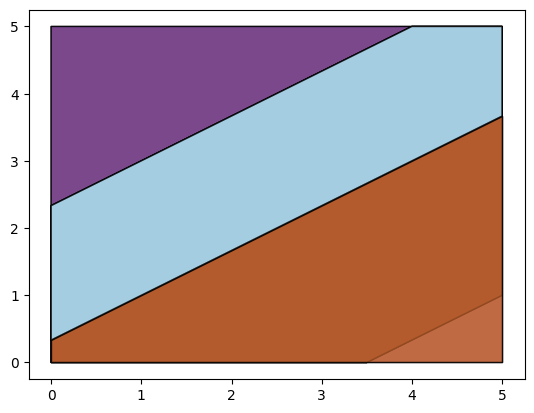

In [18]:
parametric_plot(solution_milp)